## Import Packages

In [30]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

## Load Data

In [31]:
#기본 Parameter 설정
BATCHSIZE = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 11 #0~10까지 총 11개
train_len = 1534 #총 파일 수

train_dir = "../input/full/" #train 폴더 경로 지정(끝에 / 까지 쳐야함)

In [32]:
from tqdm import tqdm #진행상황바 표시해주는 패키지

def get_data(folder, data_len): #data불러오는 함수
    
    X = np.empty((data_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((data_len,), dtype=np.int)
    cnt = 0

    for folderName in os.listdir(folder): #기존 ASL alphabet용 코드를 약간 변형시켜줌
        if not folderName.startswith('.'):
            if folderName in ['00']: #label이 0부터 시작하게 하려고 0 사진 다운 받아둠
                label = 0
            elif folderName in ['01']:
                label = 1
            elif folderName in ['02']:
                label = 2
            elif folderName in ['03']:
                label = 3
            elif folderName in ['04']:
                label = 4
            elif folderName in ['05']:
                label = 5
            elif folderName in ['06']:
                label = 6
            elif folderName in ['07']:
                label = 7
            elif folderName in ['08']:
                label = 8
            elif folderName in ['09']:
                label = 9
            elif folderName in ['10']:
                label = 10
            for image_filename in tqdm(os.listdir(folder + folderName)):
              img_file = cv2.imread(folder + folderName + '/' + image_filename)
              if img_file is not None:
                img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3)) #image 사이즈 조정
                img_arr = np.asarray(img_file)
                
                X[cnt] = img_arr
                y[cnt] = label
                cnt += 1

    return X,y

In [33]:
X_train, y_train = get_data(train_dir,train_len)

C:\Users\HCIL\AppData\Local\Temp\ipykernel_12780\50856798.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty((data_len,), dtype=np.int)
100%|████████████████████████████████████████████████████████████████████████████████| 236/236 [56:20<00:00, 14.33s/it]


In [ ]:
#pickle 파일 load
'''
import pickle

with open("./pickle/X_train_220519","rb") as file :
    X_train=pickle.load(file)
    
with open("./pickle/y_train_220519","rb") as file2 :
    y_train=pickle.load(file2)

In [9]:
#data 불러온 결과 shape출력(데이터수, imageSize, imageSize, 3) : get_data함수에서 설정해준 항목
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)
print("The shape of one image is : ", X_train[0].shape)

The shape of X_train is :  (1534, 60, 60, 3)
The shape of y_train is :  (1534,)
The shape of one image is :  (60, 60, 3)


In [11]:
#혹시 몰라 나중에 쓸 수도 있어 pickle파일 만들어봄(건너뛰어도 무관)
import pickle

X_train_220602_imagesize_60_full=X_train
y_train_220602_imagesize_60_full=y_train


with open("../pickle/X_train_220604_imagesize_64_full","wb") as file :
    pickle.dump(X_train_220602_imagesize_60_full,file)
with open("../pickle/y_train_220604_imagesize_64_full","wb") as file :
    pickle.dump(y_train_220602_imagesize_60_full,file)
    

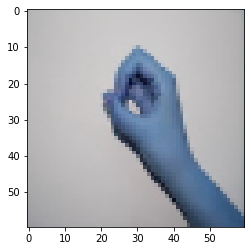

In [12]:
#예시로 이미지 출력
plt.imshow(X_train[0])
plt.show()

In [13]:
#Making copies of original data
X_data = X_train
y_data = y_train

In [14]:
#있는 데이터로 train, test split해주는 함수, test_size에서 비율 조정 가능
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [15]:
#train,test split된 것 출력해서 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1073, 60, 60, 3)
(1073,)
(461, 60, 60, 3)
(461,)


## Modeling

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

In [19]:
#Building model
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(11, activation='softmax')) #softmax함수 이용해서 총 11개 Class(0~10)분류

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 32)        2432      
                                                                 
 activation (Activation)     (None, 56, 56, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [20]:
#Early Stopping함수를 이용해서 patience수가 넘어가면 자동으로 Early Stopping되게 함
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [21]:
#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#Model fitting
model.fit(X_train, y_train,
          epochs=50,
          batch_size=BATCHSIZE,
          verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/50
17/17 - 5s - loss: 2.3857 - accuracy: 0.1528 - val_loss: 2.3676 - val_accuracy: 0.1540 - 5s/epoch - 305ms/step
Epoch 2/50
17/17 - 3s - loss: 2.3608 - accuracy: 0.1538 - val_loss: 2.3529 - val_accuracy: 0.1540 - 3s/epoch - 198ms/step
Epoch 3/50
17/17 - 3s - loss: 2.2834 - accuracy: 0.1771 - val_loss: 2.1885 - val_accuracy: 0.2278 - 3s/epoch - 197ms/step
Epoch 4/50
17/17 - 3s - loss: 1.9841 - accuracy: 0.2842 - val_loss: 1.9613 - val_accuracy: 0.2668 - 3s/epoch - 199ms/step
Epoch 5/50
17/17 - 3s - loss: 1.7553 - accuracy: 0.3756 - val_loss: 1.8987 - val_accuracy: 0.3210 - 3s/epoch - 197ms/step
Epoch 6/50
17/17 - 3s - loss: 1.6155 - accuracy: 0.4259 - val_loss: 1.7043 - val_accuracy: 0.4317 - 3s/epoch - 196ms/step
Epoch 7/50
17/17 - 3s - loss: 1.4089 - accuracy: 0.5135 - val_loss: 1.5608 - val_accuracy: 0.5271 - 3s/epoch - 198ms/step
Epoch 8/50
17/17 - 3s - loss: 1.2775 - accuracy: 0.5797 - val_loss: 1.5169 - val_accuracy: 0.4967 - 3s/epoch - 196ms/step
Epoch 9/50
17/17 - 3s - 

## Result

In [23]:
#Model metrics
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,2.385709,0.152842,2.367618,0.154013
1,2.360791,0.153774,2.352854,0.154013
2,2.283397,0.177074,2.188478,0.227766
3,1.984134,0.284250,1.961314,0.266811
4,1.755307,0.375582,1.898708,0.321041
5,1.615455,0.425909,1.704254,0.431670
6,1.408913,0.513514,1.560835,0.527115
7,1.277484,0.579683,1.516910,0.496746
8,1.139469,0.640261,1.423322,0.548807
9,0.913152,0.695247,1.285390,0.587852


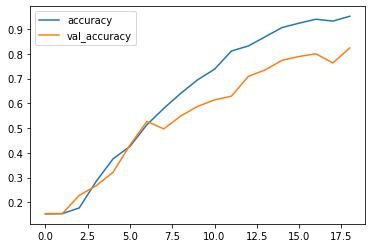

In [24]:
#저장된 accuracy 그래프로 출력
metrics[['accuracy','val_accuracy']].plot()
plt.show()

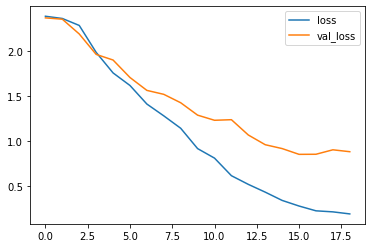

In [25]:
#저장된 loss 그래프로 출력
metrics[['loss','val_loss']].plot()
plt.show()

In [26]:
#Model evaluation
model.evaluate(X_test,y_test,verbose=0)

[0.8786205649375916, 0.8242949843406677]

In [27]:
y_predictions=model.predict(X_test)
predictions=y_predictions.argmax(axis=1)

15/15 [==============================] - 1s 35ms/step


In [28]:
#Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.95      0.88      0.91        41
           2       0.82      0.80      0.81        40
           3       0.79      0.90      0.84        41
           4       0.77      0.90      0.83        41
           5       0.85      0.93      0.89        42
           6       0.94      0.73      0.82        41
           7       0.76      0.76      0.76        41
           8       0.76      0.71      0.73        41
           9       0.80      0.68      0.74        41
          10       0.81      0.89      0.85        71

    accuracy                           0.82       461
   macro avg       0.84      0.82      0.82       461
weighted avg       0.83      0.82      0.82       461



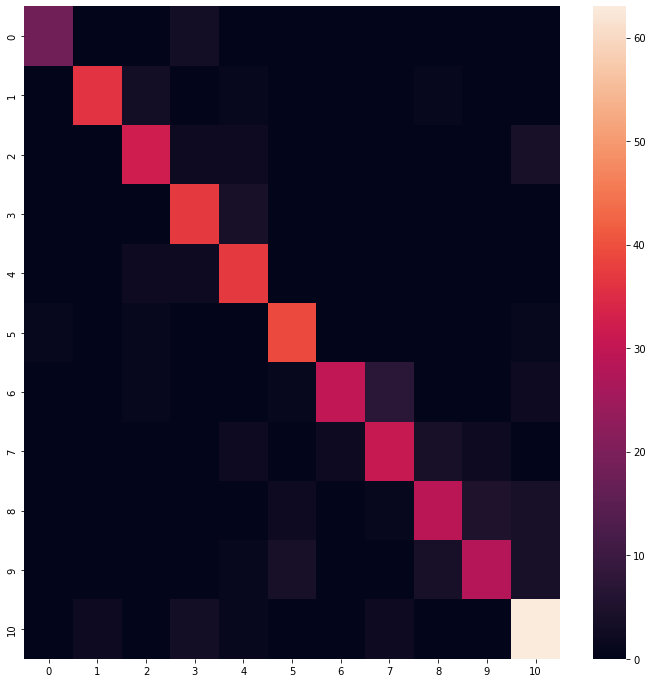

In [29]:
#Confusion matrix로 표시
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()